In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

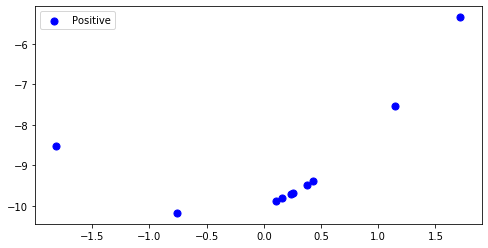

In [5]:
x1 = np.random.randn(10)
x2 = x1 + x1**2 -10

#确定画布
plt.figure(figsize=(8,4))

#绘图
plt.scatter(x1,x2 #横纵坐标
            ,s=50 #点的尺寸
            ,c='blue' #点的Y颜色
            ,label='Positive') #图例
plt.legend()#显示图例

In [7]:
x1

array([ 0.10497548,  1.71771383,  0.25718063, -1.81291818,  0.3765661 ,
        0.42657005,  1.14547748,  0.16280805, -0.76258974,  0.23786613])

In [8]:
x2

array([ -9.88400466,  -5.33174536,  -9.6766775 ,  -8.52624585,
        -9.48163187,  -9.39146795,  -7.54240385,  -9.81068549,
       -10.18104663,  -9.70555358])

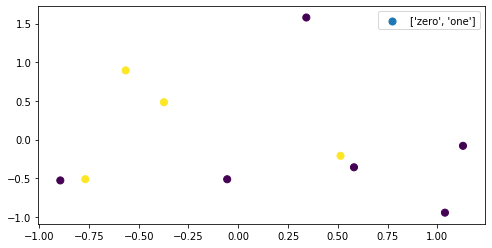

In [13]:
x = np.random.randn(10,2) #10行2列的数据集

y = np.array([0,0,1,1,0,1,0,1,0,0])

plt.figure(figsize=(8,4))

plt.scatter(x[:,0],x[:,1] #所有行第i列
           ,s=50
           ,c=y #注意
           ,label = ['zero','one']#label只能对应一种颜色
           )

plt.legend()

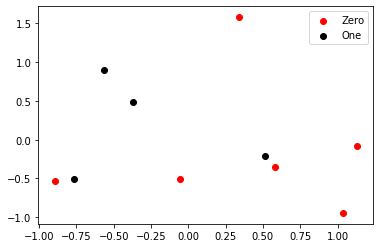

In [19]:
colors = ['red','black']
labels = ['Zero','One']

for i in range(len(set(y))): #x.shape[1] x是10，2，取第一列，2。但是是凑巧
    plt.scatter(x[y==i,0], #x取y=i的行，第0列
               x[y==i,1],
               c=colors[i],
               label=labels[i])
    
plt.legend()

https://blog.csdn.net/qq_30614345/article/details/99049790
https://yq.aliyun.com/articles/682843

In [4]:
midwest = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv')
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [8]:
categories = np.unique(midwest['category'])
categories

array(['AAR', 'AAU', 'AHR', 'ALR', 'ALU', 'HAR', 'HAU', 'HHR', 'HLR',
       'HLU', 'LAR', 'LAU', 'LHR', 'LHU'], dtype=object)

In [9]:
len(categories)

14

In [13]:
color1=plt.cm.tab10(5.2)#必须输入浮点数，颜色以元组的形式返回
color1#四个浮点数组成的一个颜色

(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


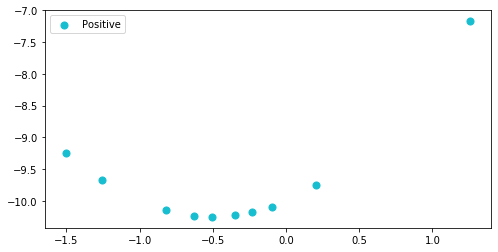

In [15]:
#看看是什么颜色

x1 = np.random.randn(10)
x2 = x1 + x1**2 -10

#确定画布
plt.figure(figsize=(8,4))

#绘图
plt.scatter(x1,x2 #横纵坐标
            ,s=50 #点的尺寸
            ,c=color1 #点的Y颜色
            ,label='Positive') #图例
plt.legend()#显示图例

In [17]:
#报错了
np.array(color1).shape #把元组变成数组。元组是一维的

(4,)

In [23]:
np.array(color1).reshape(1,-1)#一维的数值变成二维的

array([[0.09019608, 0.74509804, 0.81176471, 1.        ]])

In [20]:
np.array(color1).reshape(1,-1).shape

(1, 4)

In [25]:
np.array(color1).reshape(-1,1).shape#让列上的维度是1

(4, 1)

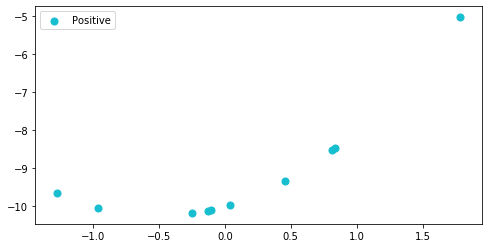

In [26]:
#解决报错

x1 = np.random.randn(10)
x2 = x1 + x1**2 -10

#确定画布
plt.figure(figsize=(8,4))

#绘图
plt.scatter(x1,x2 #横纵坐标
            ,s=50 #点的尺寸
            ,c=np.array(color1).reshape(1,-1) #点的Y颜色
            ,label='Positive') #图例
plt.legend()#显示图例

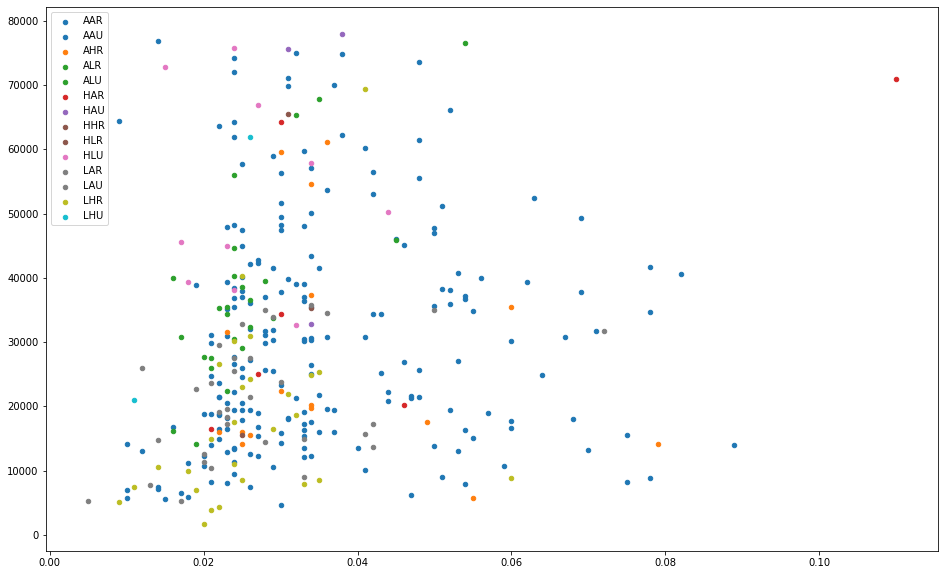

In [36]:
plt.figure(figsize=(16,10))

for i in range(len(categories)):
    plt.scatter(midwest.loc[midwest['category']==categories[i],'area']
               ,midwest.loc[midwest['category']==categories[i],'poptotal']
               ,s=20
               ,c=np.array(plt.cm.tab10(i/len(categories))).reshape(1,-1)
               ,label=categories[i])
plt.legend()


In [38]:
midwest.loc[midwest['category']==categories[0],'area']

0      0.052
2      0.022
4      0.018
5      0.050
7      0.027
       ...  
327    0.032
328    0.050
329    0.045
330    0.037
331    0.048
Name: area, Length: 186, dtype: float64

In [39]:
midwest.loc[midwest['category']==categories[0],:].head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161
5,566,BUREAU,IL,0.050,35688,713.760000,35157,50,65,195,...,3.275891,35107,98.372002,10.399635,14.158819,8.179287,11.008586,0,AAR,180.023052
7,568,CARROLL,IL,0.027,16805,622.407407,16519,111,30,61,...,3.055727,16455,97.917287,11.710726,17.225462,10.027037,9.525052,0,AAR,168.395572


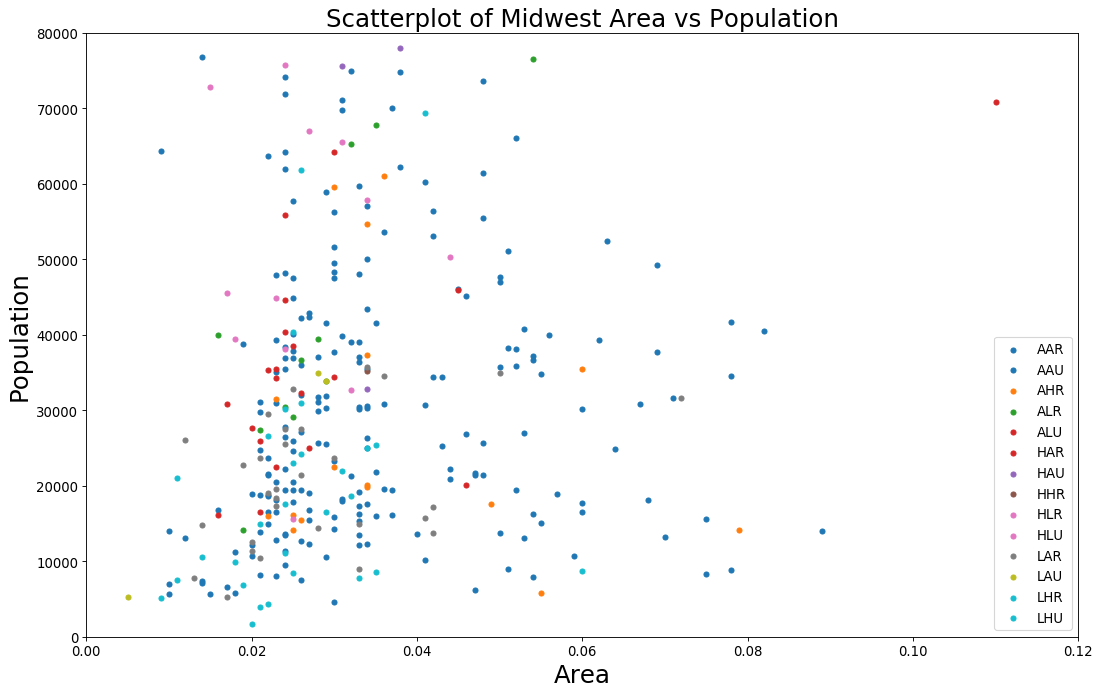

In [94]:
#丰富图像

plt.figure(figsize=(16,10)
          ,dpi=80 #分辨率
          ,facecolor='w'#图像背景
          ,edgecolor='k'#图像边框
          )


for i,category in enumerate(categories):  # 使用函数enumerate：将可遍历的数据对象组合为一个索引序列，同时列出数据和数据索引
    plt.scatter('area','poptotal'
               ,data=midwest.loc[midwest.category==category,:]
               ,s=20
               ,c=np.array(plt.cm.tab10(i/float(len(categories)-1))).reshape(1,-1)
               ,label=str(category))
    
plt.gca().set(xlim = (0, 0.12), ylim=(0, 80000))   # 设定横轴坐标的范围（元组）
plt.xticks(fontsize = 12)                          # 设定x坐标轴上字体的大小
plt.yticks(fontsize = 12)                          # 设定y坐标轴上字体的大小
plt.ylabel('Population', fontsize = 22)            # 设定y坐标轴上的标题和字体大小
plt.xlabel("Area", fontsize = 22)                  # 设定x坐标轴上的标题和字体大小
plt.title("Scatterplot of Midwest Area vs Population", fontsize = 22) # 设定整个图像的标题和字体大小
plt.legend(fontsize = 12)                          # 设定图例的字体大小


In [95]:
midwest['category'].value_counts()

AAR    186
LAR     30
LHR     27
AAU     21
AHR     16
ALU     14
ALR     11
HLU     10
HAR      6
HAU      3
LAU      3
HLR      2
LHU      2
HHR      1
Name: category, dtype: int64

In [97]:
midwest['c1']=midwest['category'].apply(lambda x:x[0])
midwest['c1'].value_counts()

A    248
L     62
H     22
Name: c1, dtype: int64